# Homework 8 Assignment 2

Default settings:

In [76]:
#As per coding convention, all imported items will be shown at the first line

#to ensure compatibility
from __future__  import print_function, division

#importing relevant packages
import matplotlib.pyplot as plt
%matplotlib inline
import pylab as pl
%pylab inline
import pandas as pd
import numpy as np
import os
import datetime # for datawrangling
import scipy as sp
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['colors', 'boxplot', 'test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
# setting puidata, despite my bash being set up correctly 
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

Path to PUIDATA /nfshome/qg412/001_PUI/PUIDATA


## Hypothesis Formulation

**Idea**: Whether there is a difference in Citibike usage on weekends

**Null hypothesis**: The mean bike trips on Saturdays are the same or less than the mean of bike trips on Sundays in 4 selected months representing each season of the year.

**Alternative hypothesis**:  The mean bike trips on Saturdays are more than the mean bike trips on Sundays in 4 selected months representing each season of the year.


$H_0$ : $Sun_{{Avg}}$ - $Sat_{{Avg}}$ >= 0

$H_1$ : $Sun_{{Avg}}$ - $Sat_{{Avg}}$ < 0

At a significance level of α=0.05

## Downloading the data

In [3]:
# From homework 4 example, downloading the data
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### checking if it is already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it, use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
months = ['201602','201605','201608', '201611']
for x in months: 
   getCitiBikeCSV(x)

file in place, you can continue
file in place, you can continue
file in place, you can continue
file in place, you can continue


In [5]:
cbdf = {}
for x in months:
   cbdf[x] = pd.read_csv("%s/%s-citibike-tripdata.csv" % (os.getenv("PUIDATA"), x))

In [6]:
cbdf['201602'].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


## Data Wrangling

In [7]:
for key, value in cbdf.items():
   print (key)
   print (value.columns)

201605
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201602
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')
201608
Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object'

In [8]:
cbdf['201611'].columns = cbdf['201602'].columns

In [9]:
cdf = pd.concat(cbdf.values())
cdf

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1
5,511,5/1/2016 00:00:33,5/1/2016 00:09:05,445,E 10 St & Avenue A,40.727408,-73.981420,537,Lexington Ave & E 24 St,40.740259,-73.984092,20592,Subscriber,1991.0,1
6,362,5/1/2016 00:00:34,5/1/2016 00:06:37,151,Cleveland Pl & Spring St,40.722104,-73.997249,229,Great Jones St,40.727434,-73.993790,15681,Subscriber,1986.0,1
7,1399,5/1/2016 00:00:37,5/1/2016 00:23:56,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,2022,E 60 St & York Ave,40.759107,-73.959223,16003,Subscriber,1989.0,1
8,515,5/1/2016 00:00:42,5/1/2016 00:09:17,368,Carmine St & 6 Ave,40.730386,-74.002150,334,W 20 St & 7 Ave,40.742388,-73.997262,20515,Subscriber,1998.0,1
9,1477,5/1/2016 00:00:50,5/1/2016 00:25:27,459,W 20 St & 11 Ave,40.746745,-74.007756,445,E 10 St & Avenue A,40.727408,-73.981420,20884,Subscriber,1995.0,1


In [13]:
cdf.reset_index(drop=True, inplace=True)
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1


In [14]:
cdf['date'] = pd.to_datetime(cdf['starttime']) 
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26


In [15]:
cdf['weekday'] = cdf['date'].apply(lambda x: x.weekday())
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekday
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,6
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,6
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,6
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20,6
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,6


In [16]:
cdf['date_only'] = cdf['date'].apply(lambda x: x.date())
cdf.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,weekday,date_only
0,538,5/1/2016 00:00:03,5/1/2016 00:09:02,536,1 Ave & E 30 St,40.741444,-73.975361,497,E 17 St & Broadway,40.737050,-73.990093,23097,Subscriber,1986.0,2,2016-05-01 00:00:03,6,2016-05-01
1,224,5/1/2016 00:00:04,5/1/2016 00:03:49,361,Allen St & Hester St,40.716059,-73.991908,340,Madison St & Clinton St,40.712690,-73.987763,23631,Subscriber,1977.0,1,2016-05-01 00:00:04,6,2016-05-01
2,328,5/1/2016 00:00:14,5/1/2016 00:05:43,301,E 2 St & Avenue B,40.722174,-73.983688,311,Norfolk St & Broome St,40.717227,-73.988021,23049,Subscriber,1980.0,1,2016-05-01 00:00:14,6,2016-05-01
3,1196,5/1/2016 00:00:20,5/1/2016 00:20:17,3141,1 Ave & E 68 St,40.765005,-73.958185,237,E 11 St & 2 Ave,40.730473,-73.986724,19019,Customer,NaN,0,2016-05-01 00:00:20,6,2016-05-01
4,753,5/1/2016 00:00:26,5/1/2016 00:13:00,492,W 33 St & 7 Ave,40.750200,-73.990931,228,E 48 St & 3 Ave,40.754601,-73.971879,16437,Subscriber,1981.0,1,2016-05-01 00:00:26,6,2016-05-01


In [17]:
#raw data with only date, weekday and date_only
cdf.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'usertype'],axis=1, inplace=True)
cdf.head()

,date,weekday,date_only
0,2016-05-01 00:00:03,6,2016-05-01
1,2016-05-01 00:00:04,6,2016-05-01
2,2016-05-01 00:00:14,6,2016-05-01
3,2016-05-01 00:00:20,6,2016-05-01
4,2016-05-01 00:00:26,6,2016-05-01


In [18]:
cdf['weekday'].value_counts()

0    745881
1    743783
2    741919
3    674636
4    605214
5    526146
6    490180
Name: weekday, dtype: int64

In [24]:
# everyday in all the 4 months
cdf2 = pd.DataFrame(cdf.groupby([ 'date_only', 'weekday']).size()).reset_index()
# renaming the newly added column as count
cdf2.columns = ['date_only', 'weekday', 'count']
cdf2.head(7)

,date_only,weekday,count
0,2016-02-01,0,24334
1,2016-02-02,1,28528
2,2016-02-03,2,16203
3,2016-02-04,3,27766
4,2016-02-05,4,13670
5,2016-02-06,5,16933
6,2016-02-07,6,17605


In [20]:
# only the weekends and the total count
cdf3 = cdf2[cdf2['weekday'] > 4]
cdf3

,date_only,weekday,count
5,2016-02-06,5,16933
6,2016-02-07,6,17605
12,2016-02-13,5,6625
13,2016-02-14,6,4653
19,2016-02-20,5,24484
20,2016-02-21,6,20052
26,2016-02-27,5,17226
27,2016-02-28,6,25437
29,2016-05-01,6,10697
35,2016-05-07,5,31078


In [43]:
# calculating mean
cdf2d = pd.DataFrame(cdf2.groupby(['weekday'])['count'].mean()).reset_index()
cdf2d

,weekday,count
0,0,39256.894737
1,1,39146.473684
2,2,41217.722222
3,3,42164.750000
4,4,37825.875000
5,5,32884.125000
6,6,28834.117647


In [42]:
# calculating standard deviation
cdf2c = pd.DataFrame(cdf2.groupby(['weekday'])['count'].std()).reset_index()
cdf2c

,weekday,count
0,0,13390.667646
1,1,16440.142061
2,2,16431.444793
3,3,15506.624584
4,4,16097.188543
5,5,12260.505373
6,6,11372.296602


In [46]:
# getting a dataframe that has mean and standard deviation
cdfe = pd.concat([pd.DataFrame(cdf2.groupby(['weekday'])['count'].mean()), \
         pd.DataFrame(cdf2.groupby(['weekday'])['count'].std())], axis=1).reset_index()
cdfe.columns = ['weekday', 'mean', 'std']

cdfe.head()

,weekday,mean,std
0,0,39256.894737,13390.667646
1,1,39146.473684,16440.142061
2,2,41217.722222,16431.444793
3,3,42164.750000,15506.624584
4,4,37825.875000,16097.188543


In [72]:
# only the overall mean for all 4 months! 
cdf4 = pd.DataFrame(cdf3.groupby(['weekday'])['count'].mean()).reset_index()
cdf4

,weekday,count
0,5,32884
1,6,28834


## Plotting figures to understand data better

**Figure 1: Scatterplot showing total trip count for each day of the week** 

In [32]:
cdf2a = cdf2.set_index('date_only')
cdf2a.head(8)

,weekday,count
date_only,,
2016-02-01,0,24334
2016-02-02,1,28528
2016-02-03,2,16203
2016-02-04,3,27766
2016-02-05,4,13670
2016-02-06,5,16933
2016-02-07,6,17605
2016-02-08,0,19026


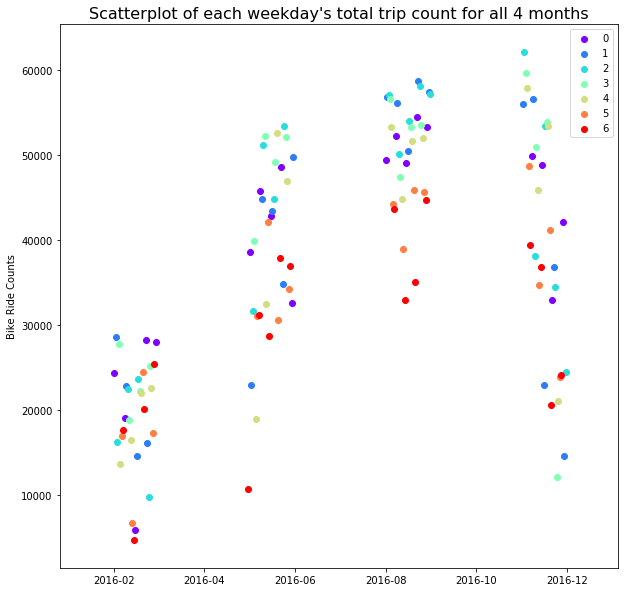

In [58]:
plt.figure(figsize=(10,10))
colors = cm.rainbow(np.linspace(0, 1, len(cdf2a['weekday'].unique())))

for x in cdf2a['weekday'].unique():
    graphweekday = cdf2a[cdf2a['weekday'] == x]
    plt.scatter(graphweekday.index, y=graphweekday['count'], color=colors[x])

plt.legend(cdf2a['weekday'].unique())
plt.ylabel("Bike Ride Counts")
plt.title("Scatterplot of each weekday's total trip count for all 4 months", fontsize=16);

Figure 1: Scatterplot showing each day's total trip count for all 4 months, color coded according to which day of the week it is where 0 is monday, 1 is tuesday, 2 is wednesday, 3 is thursday, 4 is friday, 5 is saturday and 6 is sunday. It can be observed that generally, saturdays (orange) and sundays (red) tend to have lower total trip counts than the rest of the weekday.  

**Figure 2: Error bar showing Citibike trips taken for all week day for all the 4 months**

Text(0.5,1,'Average Count of Weekday Rides and the Corresponding Error Bars')

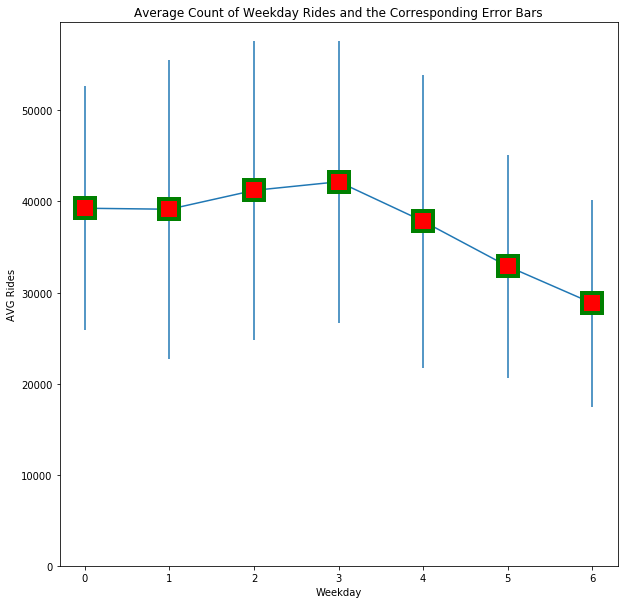

In [70]:
plt.figure(figsize=(10,10))
plt.errorbar(cdfe['weekday'], cdfe['mean'], cdfe['std'], marker='s', mfc='red',
        mec='green', ms=20, mew=4)
plt.ylim(0)
plt.xlabel('Weekday')
plt.ylabel('AVG Rides')
plt.title('Average Count of Weekday Rides and the Corresponding Error Bars')

Figure 2: Error bar showing 

**Figure 3: Box plot to see distribution of total counts**

In [66]:
days = np.unique(cdf2['weekday'])
graphweekday = []
for day in days:
    graphweekday.append(cdf2[cdf2['weekday'] == day]['count'].values)

In [67]:
def boxplot(x_data, y_data, base_color, median_color, x_label, y_label, title):
    _, ax = plt.subplots()

    # Draw boxplots, specifying desired style
    ax.boxplot(y_data
               # patch_artist must be True to control box fill
               , patch_artist = True
               # Properties of median line
               , medianprops = {'color': median_color}
               # Properties of box
               , boxprops = {'color': base_color, 'facecolor': base_color}
               # Properties of whiskers
               , whiskerprops = {'color': base_color}
               # Properties of whisker caps
               , capprops = {'color': base_color})

    # By default, the tick label starts at 1 and increments by 1 for
    # each box drawn. This sets the labels to the ones we want
    ax.set_xticklabels(x_data)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

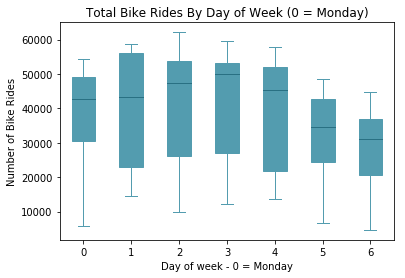

In [68]:
# Call the function to create plot
boxplot(x_data = days
        , y_data = graphweekday
        , base_color = '#539caf'
        , median_color = '#297083'
        , x_label = 'Day of week - 0 = Monday'
        , y_label = 'Number of Bike Rides'
        , title = 'Total Bike Rides By Day of Week (0 = Monday)')

**Figure 4: Bar graph showing the overall average bike trips in Saturday and Sunday throughout the 4 months**

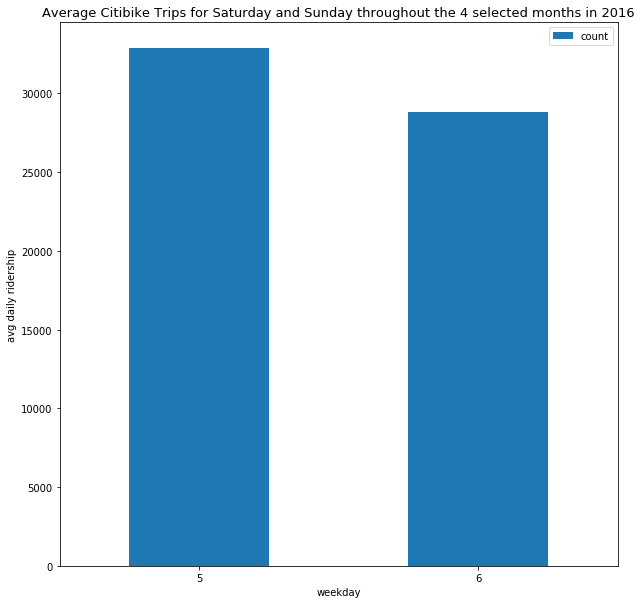

In [69]:
cdf4.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday throughout the 4 selected months in 2016', fontsize = 13);

## Running statistical test

Chosen statistical test: two sample T-test

In [73]:
sat = cdf2[cdf2['weekday']== 5]['count']
sun = cdf2[cdf2['weekday']== 6]['count']

In [78]:
pd.DataFrame(cdf2.groupby(['weekday'])['count'].var())

,count
weekday,
0,179309980
1,270278271
2,269992378
3,240455406
4,259119479
5,150319992
6,129329130


In [79]:
np.var(sat)

140924993.109375

In [80]:
np.var(sun)

121721534.22145331

In [82]:
two_sample = sp.stats.ttest_ind(sat, sun, equal_var=False)

print("The t-statistic is %.3f and the p-value is %.3f." % two_sample)

The t-statistic is 0.982 and the p-value is 0.334.


## Conclusion

The p-value of 0.334 is bigger than the significance level of 0.05, hence we do not reject null hypothesis and conclude that the mean bike trips on Saturdays are the same or less than the mean of bike trips on Sundays in the 4 months of 2016. 